<a href="https://colab.research.google.com/github/nitrogenlab/gp15wmascripts/blob/main/notebooks/comparingWeightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook compares results of our chosen weights to the relative weights of Peters et al. Peters weights of 140 for temperature, 100 for salinity, 30 for silicate, 20 for oxygen, 20 for nitrate, and 10 for phosphate (Peters et al. used 20 for NO and 10 for PO) were be used in both the thermocline and intermediate and deep waters.


In [1]:
#import our results
!wget https://stacks.stanford.edu/file/druid:tv301yr5579/FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv -O FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv

--2022-02-04 01:39:26--  https://stacks.stanford.edu/file/druid:tv301yr5579/FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350410 (342K) [text/csv]
Saving to: ‘FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv’

FinalResults_220109 100%[===================>] 342.20K   547KB/s    in 0.6s    

2022-02-04 01:39:27 (547 KB/s) - ‘FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv’ saved [350410/350410]



In [2]:
#import Peters results
!wget raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv -O peters_paper_weightings_220202.csv

--2022-02-04 01:39:27--  http://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv [following]
--2022-02-04 01:39:27--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 735475 (718K) [text/plain]
Saving to: ‘peters_paper_weightings_220202.csv’

peters_paper_weight 100%[===================>] 718.24K  --.-KB/s    in 0.007s  

2

In [3]:
#load results
import pandas
used_weight = pandas.read_csv("FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv")
used_weight.columns

Index(['lat', 'lon', 'Depth', 'CTD pressure', 'stnnbr', 'geotrc_ID', 'sigma0',
       'tc', 'conservative_temp', 'absolute_salinity', 'silicate', 'nitrate',
       'phosphate', 'oxygen', 'conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total', 'AABW_0_frac', 'AAIW_0_frac', 'AAIW_1_frac',
       'ENPCW_frac', 'ENPCW_0_frac', 'ENPCW_1_frac', 'ESSW_frac',
       'ESSW_0_frac', 'ESSW_1_frac', 'EqIW_0_frac', 'EqIW_1_frac',
       'LCDW_0_frac', 'LCDW_1_frac', 'NPIW_0_frac', 'NPIW_1_frac',
       'NPIW_2_frac', 'PDW_0_frac', 'PDW_1_frac', 'PDW_2_frac', 'PSUW_frac',
       'PSUW_0_frac', 'PSUW_1_frac', 'SPCW_frac', 'SPCW_0_frac', 'SPCW_1_frac',
       'SPSTSW_

In [4]:
#load results
import pandas
peters_weight = pandas.read_csv("peters_paper_weightings_220202.csv")
peters_weight.columns

Index(['lat', 'lon', 'Depth', 'CTD pressure', 'CTD temperature',
       'practical_salinity', 'stnnbr', 'geotrc_ID', 'sigma0', 'tc',
       'conservative_temp', 'absolute_salinity', 'silicate', 'nitrate',
       'phosphate', 'oxygen', 'conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total', 'AABW_0_frac', 'AAIW_0_frac', 'AAIW_1_frac',
       'ENPCW_frac', 'ENPCW_0_frac', 'ENPCW_1_frac', 'ESSW_frac',
       'ESSW_0_frac', 'ESSW_1_frac', 'EqIW_0_frac', 'EqIW_1_frac',
       'LCDW_0_frac', 'LCDW_1_frac', 'NPIW_0_frac', 'NPIW_1_frac',
       'NPIW_2_frac', 'PDW_0_frac', 'PDW_1_frac', 'PDW_2_frac', 'PSUW_frac',
       'PSUW_0_frac', 'PSUW_1_frac', 'SPCW_frac

In [5]:
resid_frac = ['conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total']
# create an empty dataframe
# with columns
diff_df  = pandas.DataFrame()
#columns = resid_frac

In [6]:
from numpy.core.numeric import NaN
for name in resid_frac:
  diff_df[name] = used_weight[name] - peters_weight[name]
  for diff in  range(len(diff_df[name])):
    if used_weight[name][diff] == 0 and peters_weight[name][diff] == 0:
      diff_df[name][diff] =  NaN
    else:
      pass

(0.0, 1000.0)

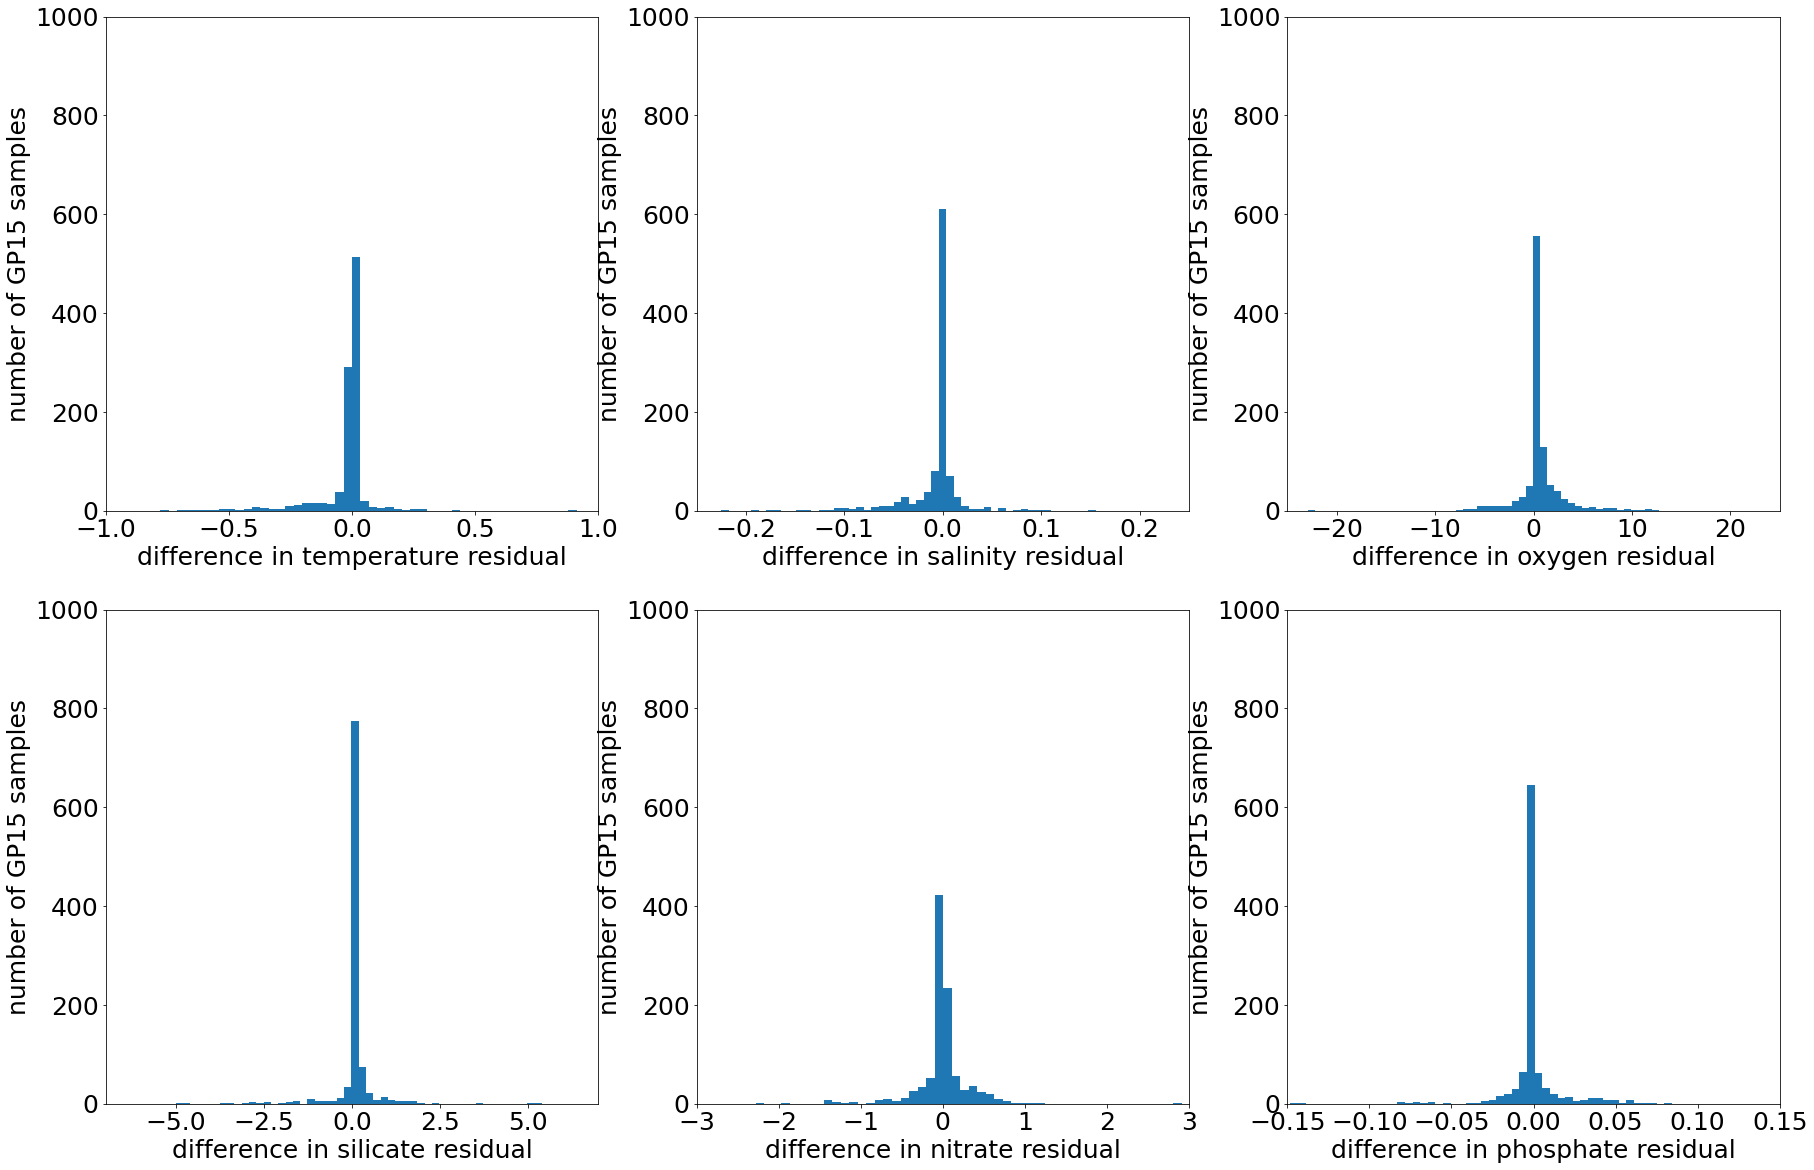

In [7]:
#plot difference in residuals
import matplotlib.pyplot
fig1 = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

ax1 = fig1.add_subplot(2, 3, 1)
ax2 = fig1.add_subplot(2, 3, 2)
ax3 = fig1.add_subplot(2, 3, 3)
ax4 = fig1.add_subplot(2, 3, 4)
ax5 = fig1.add_subplot(2, 3, 5)
ax6 = fig1.add_subplot(2, 3, 6)


#conservative temp plot
ax1.set_ylabel('number of GP15 samples', fontsize=25)
ax1.set_xlabel('difference in temperature residual', fontsize=25)
ax1.hist(diff_df["conservative_temp_resid"], bins=50)
ax1.tick_params(axis='y',labelsize=25)
ax1.tick_params(axis='x',labelsize=25)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#sal plot
ax2.set_ylabel('number of GP15 samples', fontsize=25)
ax2.set_xlabel('difference in salinity residual', fontsize=25)
ax2.hist(diff_df["absolute_salinity_resid"], bins=50)
ax2.tick_params(axis='y',labelsize=25)
ax2.tick_params(axis='x',labelsize=25)
ax2.set_xlim(-0.25, 0.25)
#ax2.set_ylim(0,1000)

#oxy plot
ax3.set_ylabel('number of GP15 samples', fontsize=25)
ax3.set_xlabel('difference in oxygen residual', fontsize=25)
ax3.hist(diff_df["oxygen_resid"], bins=50)
ax3.tick_params(axis='y',labelsize=25)
ax3.tick_params(axis='x',labelsize=25)
ax3.set_xlim(-25, 25)
#ax3.set_ylim(0,1000)

#si plot
ax4.set_ylabel('number of GP15 samples', fontsize=25)
ax4.set_xlabel('difference in silicate residual', fontsize=25)
ax4.hist(diff_df["silicate_resid"], bins=50)
ax4.tick_params(axis='y',labelsize=25)
ax4.tick_params(axis='x',labelsize=25)
ax4.set_xlim(-7, 7)
#ax4.set_ylim(0,1000)

#nitrate plot
ax5.set_ylabel('number of GP15 samples', fontsize=25)
ax5.set_xlabel('difference in nitrate residual', fontsize=25)
ax5.hist(diff_df["nitrate_resid"], bins=50)
ax5.tick_params(axis='y',labelsize=25)
ax5.tick_params(axis='x',labelsize=25)
ax5.set_xlim(-3, 3)
#ax5.set_ylim(0,1000)

#phosphate plot
ax6.set_ylabel('number of GP15 samples', fontsize=25)
ax6.set_xlabel('difference in phosphate residual', fontsize=25)
ax6.hist(diff_df["phosphate_resid"], bins=50)
ax6.tick_params(axis='y',labelsize=25)
ax6.tick_params(axis='x',labelsize=25)
ax6.set_xlim(-0.15, 0.15)
#ax6.set_ylim(0,1000)

(-1.0, 1.0)

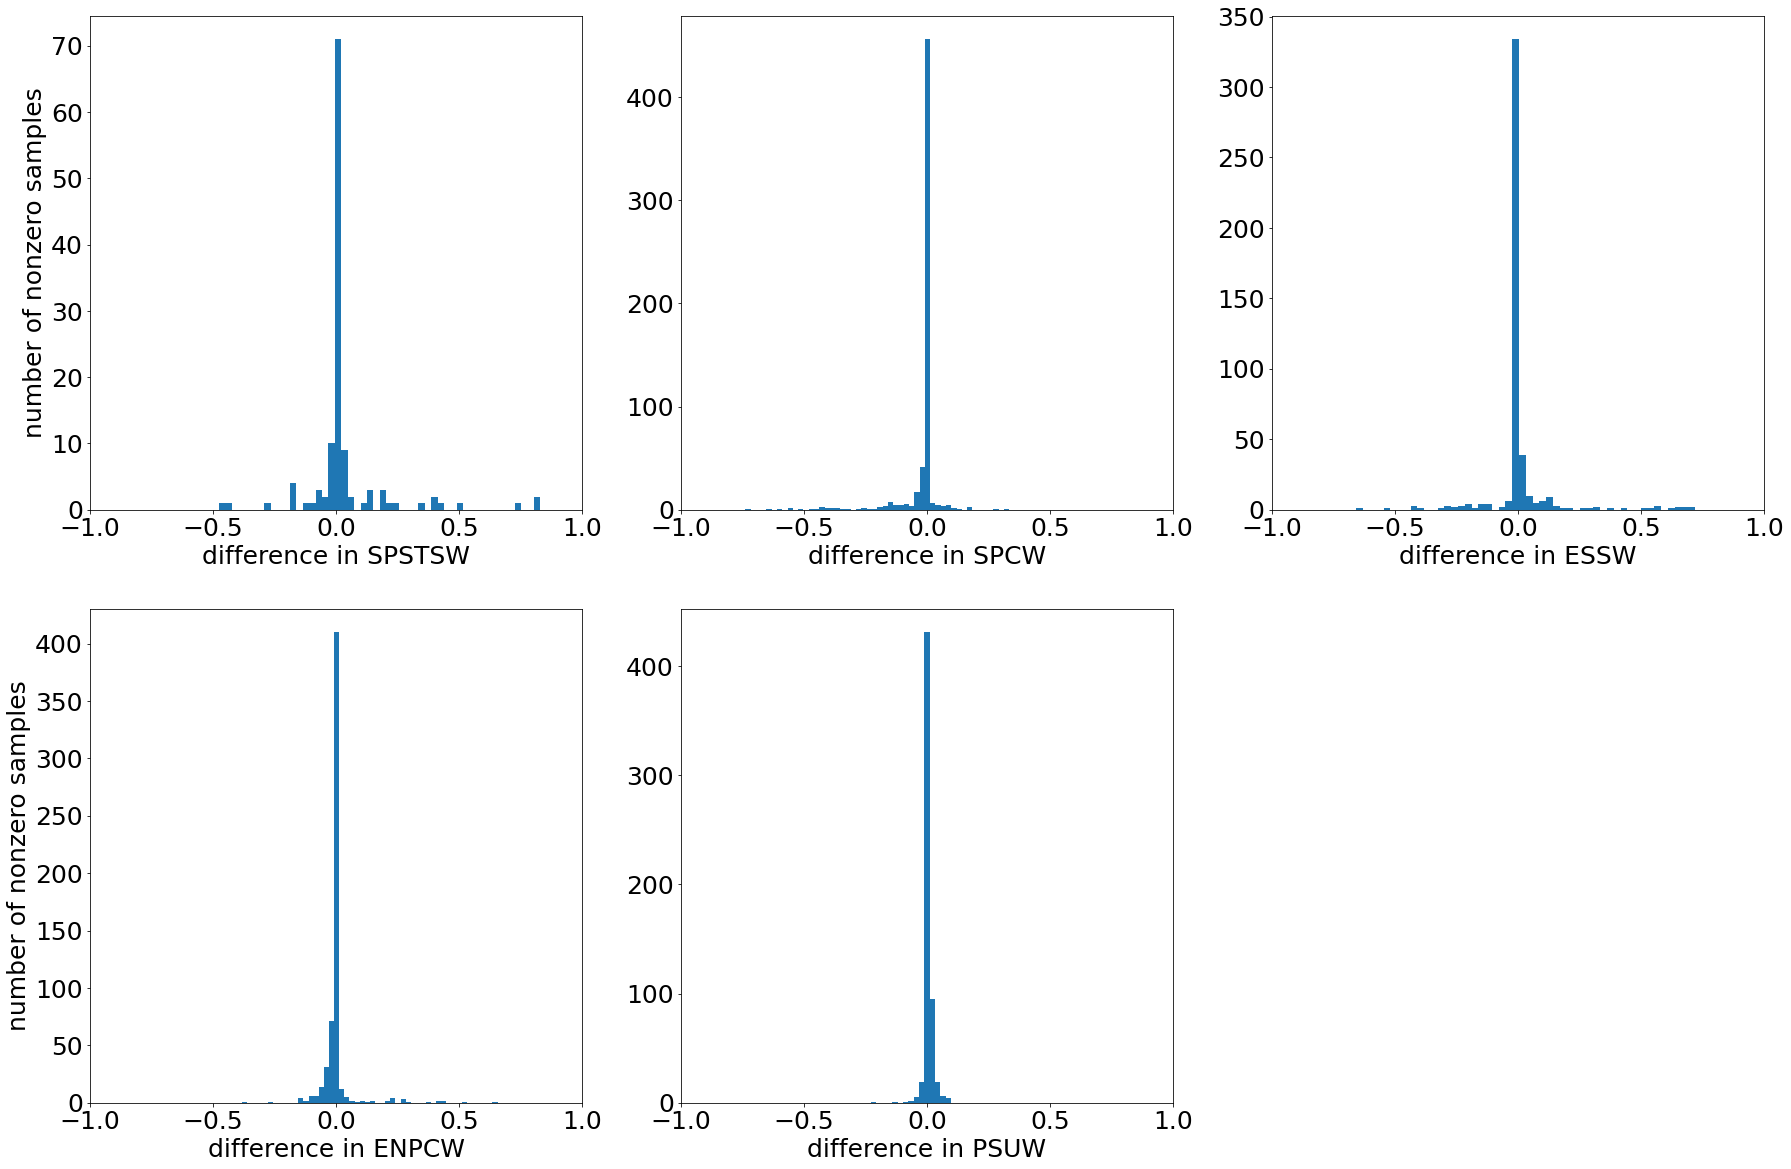

In [12]:
#plot difference in water mass fractions
import matplotlib.pyplot
fig1 = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

ax1 = fig1.add_subplot(2, 3, 1)
ax2 = fig1.add_subplot(2, 3, 2)
ax3 = fig1.add_subplot(2, 3, 3)
ax4 = fig1.add_subplot(2, 3, 4)
ax6 = fig1.add_subplot(2, 3, 5)


#SPSTSW
ax1.set_ylabel('number of nonzero samples', fontsize=25)
ax1.set_xlabel('difference in SPSTSW', fontsize=25)
ax1.hist(diff_df["SPSTSW_frac_total"], bins=50)
ax1.tick_params(axis='y',labelsize=25)
ax1.tick_params(axis='x',labelsize=25)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#SPCW
#ax2.set_ylabel('number of samples', fontsize=25)
ax2.set_xlabel('difference in SPCW', fontsize=25)
ax2.hist(diff_df["SPCW_frac_total"], bins=50)
ax2.tick_params(axis='y',labelsize=25)
ax2.tick_params(axis='x',labelsize=25)
ax2.set_xlim(-1, 1)
#ax2.set_ylim(0,1000)

#ESSW
#ax3.set_ylabel('number of samples', fontsize=25)
ax3.set_xlabel('difference in ESSW', fontsize=25)
ax3.hist(diff_df["ESSW_frac_total"], bins=50)
ax3.tick_params(axis='y',labelsize=25)
ax3.tick_params(axis='x',labelsize=25)
ax3.set_xlim(-1, 1)
#ax3.set_ylim(0,1000)

#ENPCW
ax4.set_ylabel('number of nonzero samples', fontsize=25)
ax4.set_xlabel('difference in ENPCW', fontsize=25)
ax4.hist(diff_df["ENPCW_frac_total"], bins=50)
ax4.tick_params(axis='y',labelsize=25)
ax4.tick_params(axis='x',labelsize=25)
ax4.set_xlim(-1, 1)
#ax4.set_ylim(0,1000)


#PSUW
#ax6.set_ylabel('number of samples', fontsize=25)
ax6.set_xlabel('difference in PSUW', fontsize=25)
ax6.hist(diff_df["PSUW_frac_total"], bins=15)
ax6.tick_params(axis='y',labelsize=25)
ax6.tick_params(axis='x',labelsize=25)
ax6.set_xlim(-1, 1)
#ax6.set_ylim(0,1000)

(-1.0, 1.0)

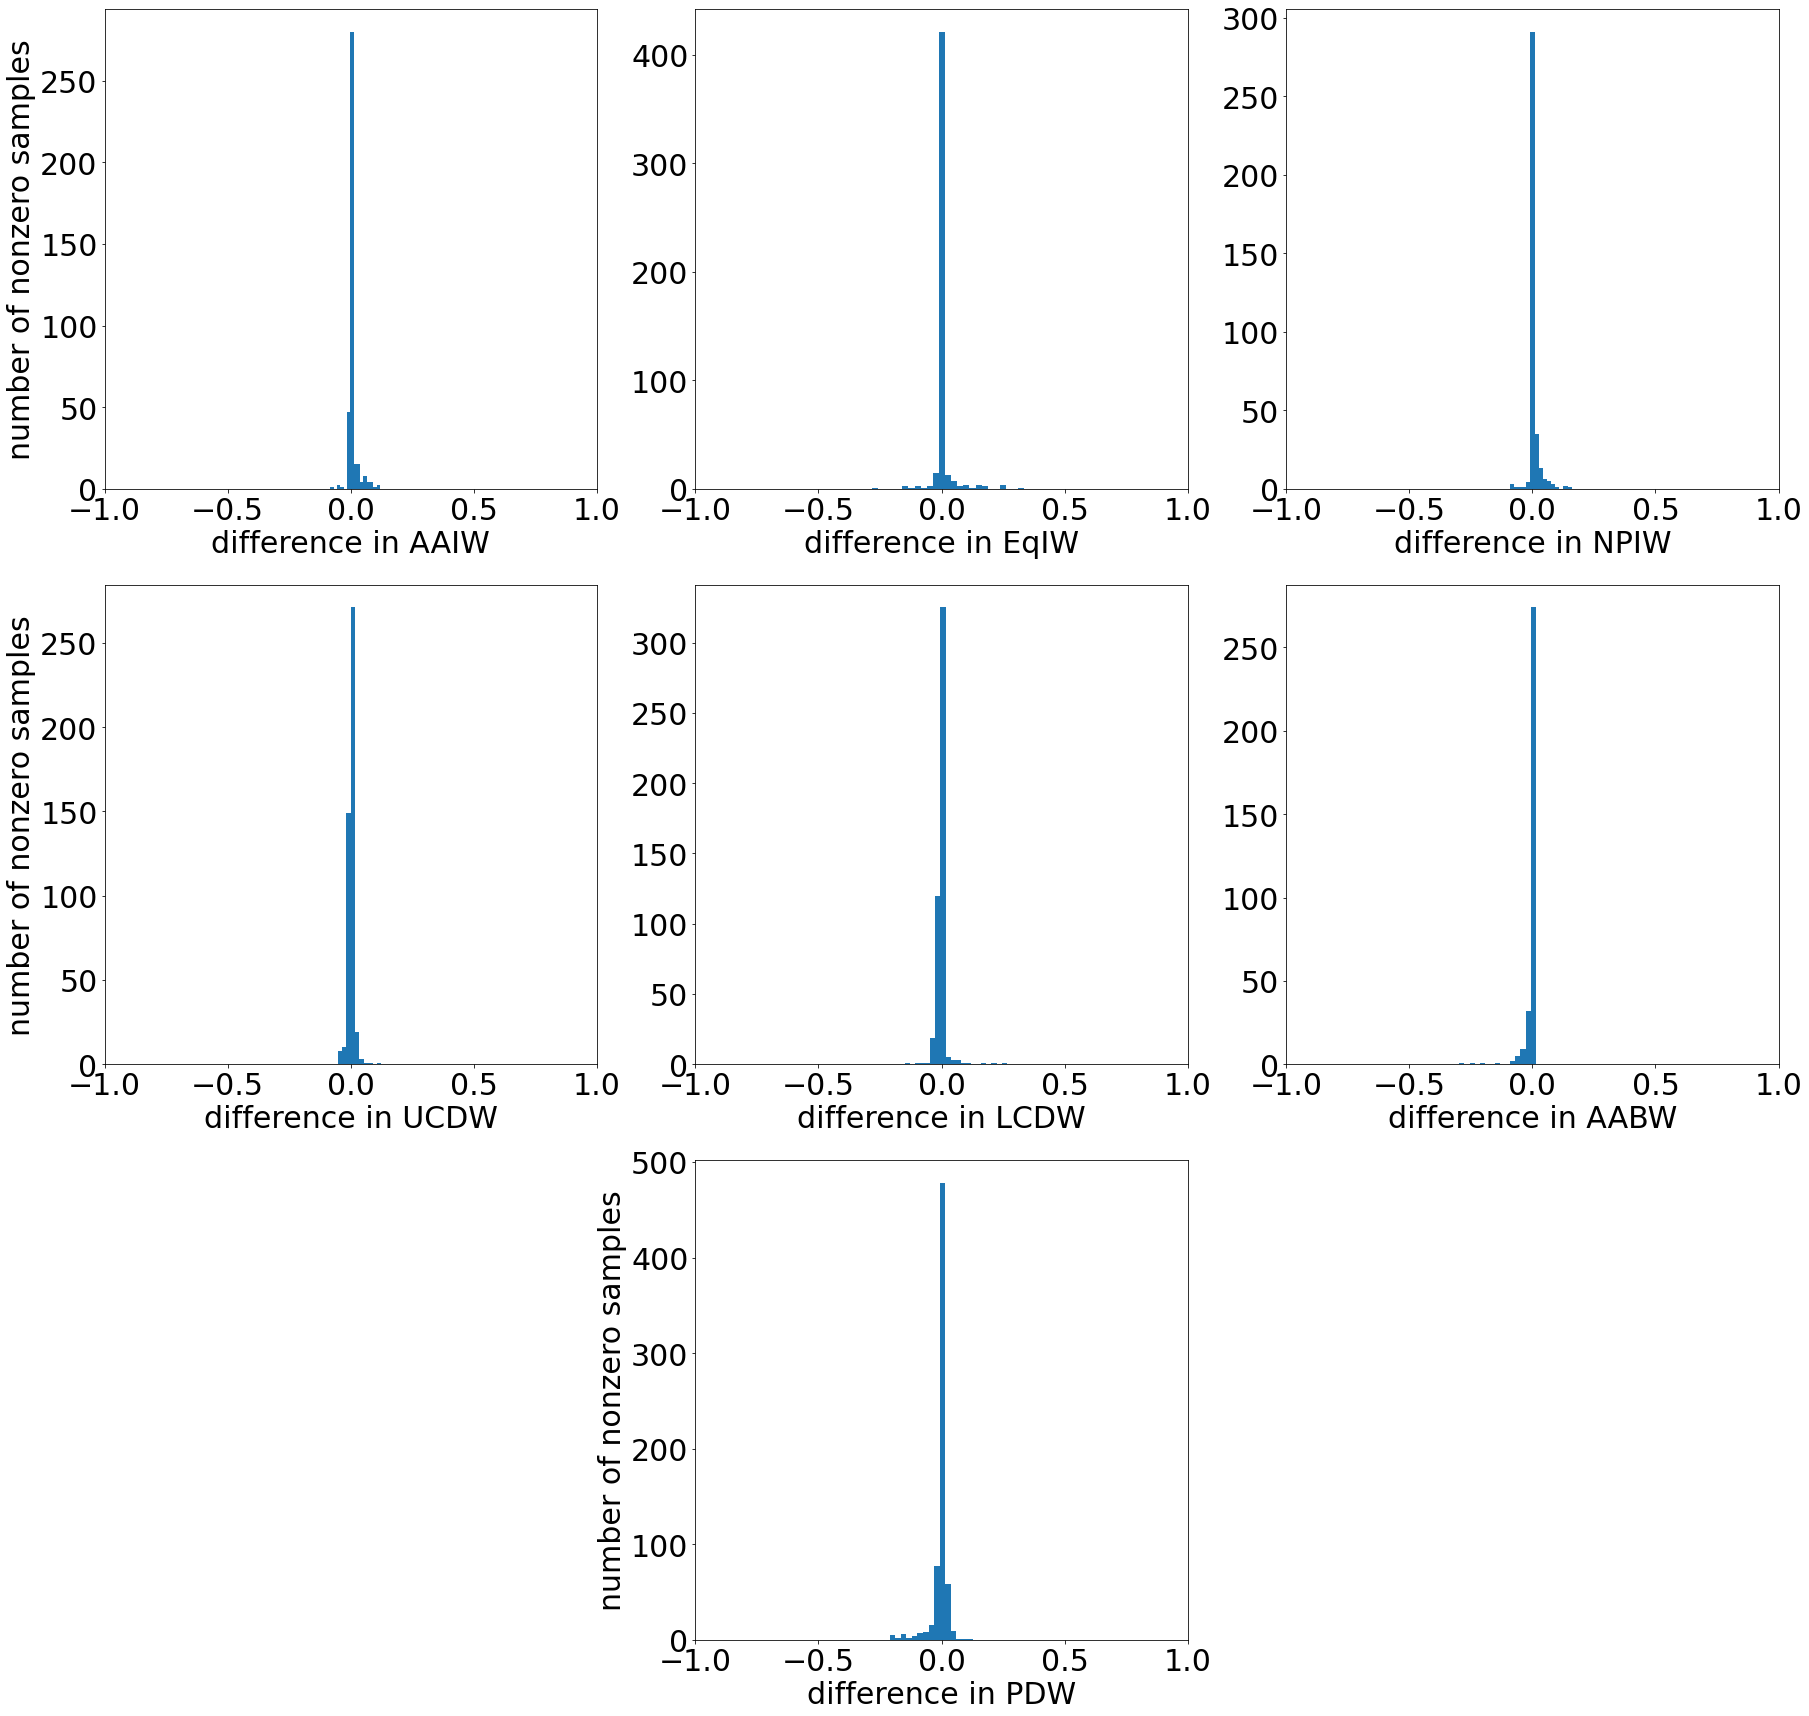

In [13]:
fig2 = matplotlib.pyplot.figure(figsize=(30.0, 30.0))

ax1 = fig2.add_subplot(3, 3, 1)
ax2 = fig2.add_subplot(3, 3, 2)
ax3 = fig2.add_subplot(3, 3, 3)
ax4 = fig2.add_subplot(3, 3, 4)
ax5 = fig2.add_subplot(3, 3, 5)
ax6 = fig2.add_subplot(3, 3, 6)
ax7 = fig2.add_subplot(3, 3, 8)


#conservative temp plot
ax1.set_ylabel('number of nonzero samples', fontsize=30)
ax1.set_xlabel('difference in AAIW', fontsize=30)
ax1.hist(diff_df["AAIW_frac_total"], bins=15)
ax1.tick_params(axis='y',labelsize=30)
ax1.tick_params(axis='x',labelsize=30)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#sal plot
#ax2.set_ylabel('number of samples', fontsize=25)
ax2.set_xlabel('difference in EqIW', fontsize=30)
ax2.hist(diff_df["EqIW_frac_total"], bins=25)
ax2.tick_params(axis='y',labelsize=30)
ax2.tick_params(axis='x',labelsize=30)
ax2.set_xlim(-1, 1)
#ax2.set_ylim(0,1000)

#oxy plot
#ax3.set_ylabel('number of samples', fontsize=25)
ax3.set_xlabel('difference in NPIW', fontsize=30)
ax3.hist(diff_df["NPIW_frac_total"], bins=15)
ax3.tick_params(axis='y',labelsize=30)
ax3.tick_params(axis='x',labelsize=30)
ax3.set_xlim(-1, 1)
#ax3.set_ylim(0,1000)

#si plot
ax4.set_ylabel('number of nonzero samples', fontsize=30)
ax4.set_xlabel('difference in UCDW', fontsize=30)
ax4.hist(diff_df["UCDW_frac_total"], bins=10)
ax4.tick_params(axis='y',labelsize=30)
ax4.tick_params(axis='x',labelsize=30)
ax4.set_xlim(-1, 1)
#ax4.set_ylim(0,1000)

#nitrate plot
#ax5.set_ylabel('number of samples', fontsize=25)
ax5.set_xlabel('difference in LCDW', fontsize=30)
ax5.hist(diff_df["LCDW_frac_total"], bins=20)
ax5.tick_params(axis='y',labelsize=30)
ax5.tick_params(axis='x',labelsize=30)
ax5.set_xlim(-1, 1)
#ax5.set_ylim(0,1000)

#phosphate plot
#ax6.set_ylabel('number of samples', fontsize=30)
ax6.set_xlabel('difference in AABW', fontsize=30)
ax6.hist(diff_df["AABW_frac_total"], bins=15)
ax6.tick_params(axis='y',labelsize=30)
ax6.tick_params(axis='x',labelsize=30)
ax6.set_xlim(-1, 1)
#ax6.set_ylim(0,1000)

#phosphate plot
ax7.set_ylabel('number of nonzero samples', fontsize=30)
ax7.set_xlabel('difference in PDW', fontsize=30)
ax7.hist(diff_df["PDW_frac_total"], bins=15)
ax7.tick_params(axis='y',labelsize=30)
ax7.tick_params(axis='x',labelsize=30)
ax7.set_xlim(-1, 1)
#ax7.set_ylim(0,1000)